# Proyecto Integrador

## Score de Riesgo en Originación de Crédito
## Para Kubo Financiero

Participantes:

Dalina Aideé Villa Ocelotl (A01793258)

Julián Valera Juarez (A01793875)

Miguel Guillermo Galindo Orozco (A01793695)
1793695)

## Avance 3. Baseline

### Importar librerías

In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix, classification_report, roc_curve, auc, accuracy_score
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter
from sklearn.metrics import roc_auc_score

### Lectura de data a utilizar

In [2]:
# Leer archivo Excel
file_path = 'base_20210101a20240430 (2).xlsx'
df = pd.read_excel(file_path, sheet_name='Cliientes_Nuevos')

In [3]:
df.head(10)

,prospectus_id,Edad,Genero,EstadoCivil,DependientesEconomicos,Estado,ActividadEconomica,NivelEstudios,NumCaracteresSobreMi,consulting_date,...,MontoCredR,NumCredI,MontoCredI,NumCredM,MontoCredM,montocredito_actual,estatus_actual,diasatraso_actual,es_malo_actual,saldo_actual
0,3872,46,Hombre,Casado (sociedad conyugal),1,Ciudad de México,Empleado,Bachillerato,28,2021-09-06 15:19:27,...,14997.0,10.0,98826.0,0.0,0.0,50000,P,0,0,NaN
1,7207,43,Hombre,Soltero,0,Ciudad de México,Empleado,Maestría,113,2021-10-14 13:45:49,...,10469.0,49.0,37484.0,0.0,0.0,48000,P,0,0,NaN
2,8105,51,Mujer,Casado (sociedad conyugal),más de 4,Ciudad de México,Empresario/Socio,Licenciatura,0,2022-05-18 20:06:57,...,527690.0,1.0,113100.0,0.0,0.0,10000,P,0,0,NaN
3,9969,48,Hombre,Casado (bienes separados),1,Ciudad de México,Profesionista independiente,Licenciatura,25,2024-01-15 15:11:58,...,33826.0,1.0,50900.0,0.0,0.0,100000,V,0,0,93219.72
4,12520,53,Hombre,Casado (bienes separados),3,Baja California,Empleado,Maestría,79,2021-07-07 20:44:43,...,305643.0,1.0,253688.0,2.0,251228.0,53000,P,0,0,NaN
5,13644,37,Mujer,Soltero,1,Ciudad de México,Dueño de negocio,Licenciatura,19,2022-05-16 15:48:52,...,94413.0,10.0,80804.0,0.0,0.0,30000,P,0,0,NaN
6,17632,50,Mujer,Casado (bienes separados),0,Michoacán de Ocampo,Empleado,Licenciatura,0,2021-06-04 13:18:41,...,18859.0,9.0,385240.0,1.0,89697.0,35000,P,0,1,NaN
7,19042,31,Mujer,Casado (sociedad conyugal),0,Estado de México,Dueño de negocio,Licenciatura,0,2022-04-07 13:38:03,...,14303.0,5.0,29679.0,0.0,0.0,30000,P,0,1,NaN
8,19108,40,Hombre,Unión Libre,1,Ciudad de México,Dueño de negocio,Licenciatura,62,2022-08-25 21:30:35,...,15199.0,7.0,547893.0,0.0,0.0,15000,P,0,0,NaN
9,20073,28,Hombre,Soltero,0,Ciudad de México,Empleado,Licenciatura,0,2022-11-15 11:05:06,...,44789.0,0.0,0.0,0.0,0.0,90000,P,0,0,NaN


1. Eliminamos variables que son futuras (o al momento de performance) que no nos sirven para el caso de uso de nuestro modelo de ML.
2. Eliminamos aquellos registros sin flag de performance (es_malo_actual NULL)

In [4]:
variables_eliminar = ["montocredito_actual", "estatus_actual","diasatraso_actual","saldo_actual"]
variables_ok = [i for i in df.columns if i not in variables_eliminar ]
df = df[variables_ok]

In [5]:
df = df[df['es_malo_actual'].isin([0,1])]

In [6]:
df = df.dropna()
df.shape[0]

35180

### Separar la base de desarrollo en entrenamiento, test 

In [7]:
print('Registros en el set de Entrenamiento y Test', df.shape[0])

Registros en el set de Entrenamiento y Test 35180


In [8]:
y = df['es_malo_actual']
X = df.drop(['es_malo_actual'], axis=1)

In [9]:
# Eliminar columnas tipo datetime
X = X.select_dtypes(exclude=['datetime64'])

In [10]:
# Convertir características categóricas a variables dummy
X = pd.get_dummies(X, drop_first=True)

In [11]:
# Escalar los datos
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [12]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled,y, test_size = 0.2,random_state = 1234, shuffle = True)

# Comprobar el número de registros
print('Registros en el set de Entrenamiento', X_train.shape[0])
print('Registros en el set de test', X_test.shape[0])
print(f"El set de Entrenamiento tiene una tasa de mora de {sorted(Counter(y_train).items())[1][1]/X_train.shape[0]} mientras que el set de test tiene una tasa de mora del  {sorted(Counter(y_test).items())[1][1]/X_test.shape[0]}.")

Registros en el set de Entrenamiento 28144
Registros en el set de test 7036
El set de Entrenamiento tiene una tasa de mora de 0.20096645821489484 mientras que el set de test tiene una tasa de mora del  0.20210346787947697.


### Entrenamiento de Regresión Logística

In [13]:
# Entrenar el modelo de regresión logística como baseline
model = LogisticRegression(max_iter=2000)
model.fit(X_train, y_train)

LogisticRegression(max_iter=2000)

In [14]:
# Hacer predicciones en el conjunto de prueba
y_pred = model.predict(X_test)

### Métrica de ROC

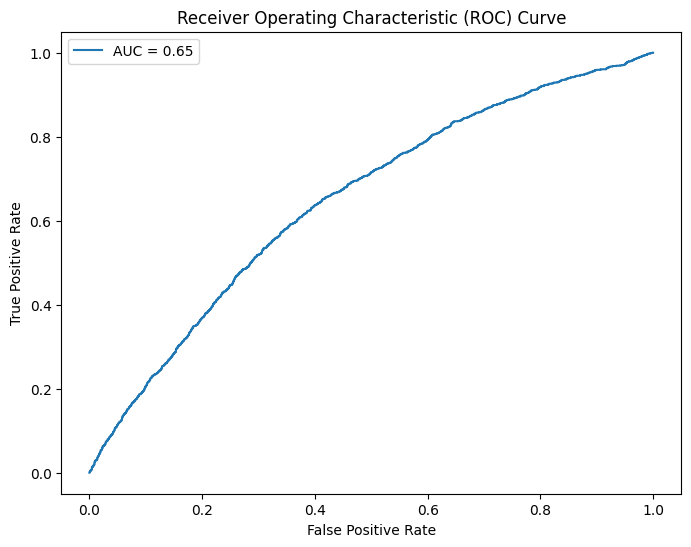

In [15]:
# Calcular la curva ROC y AUC-ROC
y_probs = model.predict_proba(X_test)[:, 1]
fpr, tpr, thresholds = roc_curve(y_test, y_probs)
auc_score = auc(fpr, tpr)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f'AUC = {auc_score:.2f}')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend()
plt.show()

### Matriz de Confusión y F1 Score

In [17]:
# Crear Matriz de confusión
conf_matrix = confusion_matrix(y_test, y_pred)
print("Matriz de Confusión:")
print(conf_matrix)

Matriz de Confusión:
[[5591   23]
 [1412   10]]


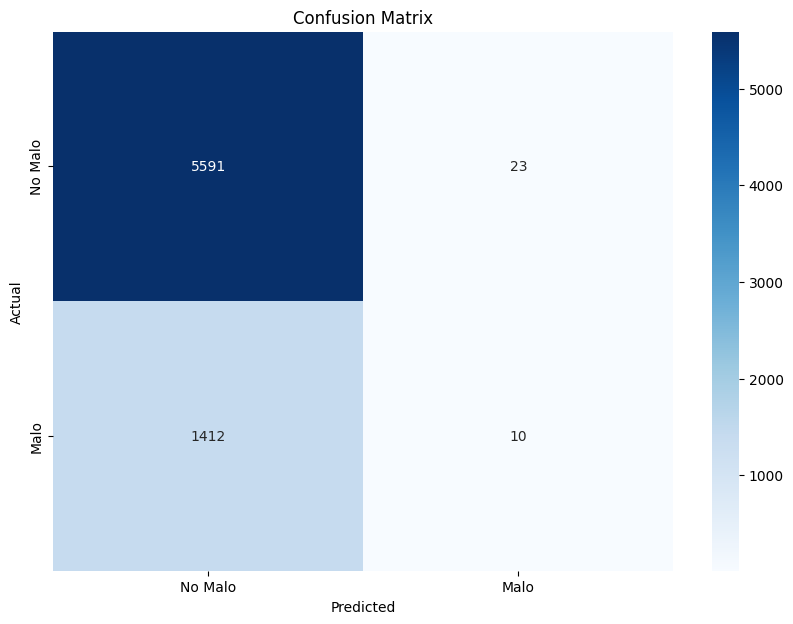

In [18]:
# Grafica de Matriz de confusión
plt.figure(figsize=(10, 7))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['No Malo', 'Malo'], yticklabels=['No Malo', 'Malo'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

In [19]:
# Informe de clasificación
class_report = classification_report(y_test, y_pred)
print("Informe de Clasificación:")
print(class_report)

Informe de Clasificación:
              precision    recall  f1-score   support

           0       0.80      1.00      0.89      5614
           1       0.30      0.01      0.01      1422

    accuracy                           0.80      7036
   macro avg       0.55      0.50      0.45      7036
weighted avg       0.70      0.80      0.71      7036



### Feature Importances

In [20]:
# Identificar características importantes utilizando coeficientes de regresión logística
feature_importance = pd.DataFrame({'Feature': X.columns, 'Coefficient': model.coef_[0]})
print('Importancia de las características:')
pd.set_option('display.max_rows', None)
print(feature_importance)

Importancia de las características:
                                           Feature  Coefficient
0                                    prospectus_id    -0.193507
1                                             Edad     0.025769
2                             NumCaracteresSobreMi    -0.010934
3                                        cci_score    -0.132154
4                                         bc_score    -0.145340
5                                      NumCredHist    -0.932098
6                                    MontoCredHist    -0.016403
7                                    CredMobMayor2    -0.008369
8                                   NumCredActivos     0.173888
9                                 MontoCredActivos    -0.158458
10                                        NumCredR    -0.007093
11                                      MontoCredR     0.045424
12                                        NumCredI     0.837555
13                                      MontoCredI     0.025353
14  

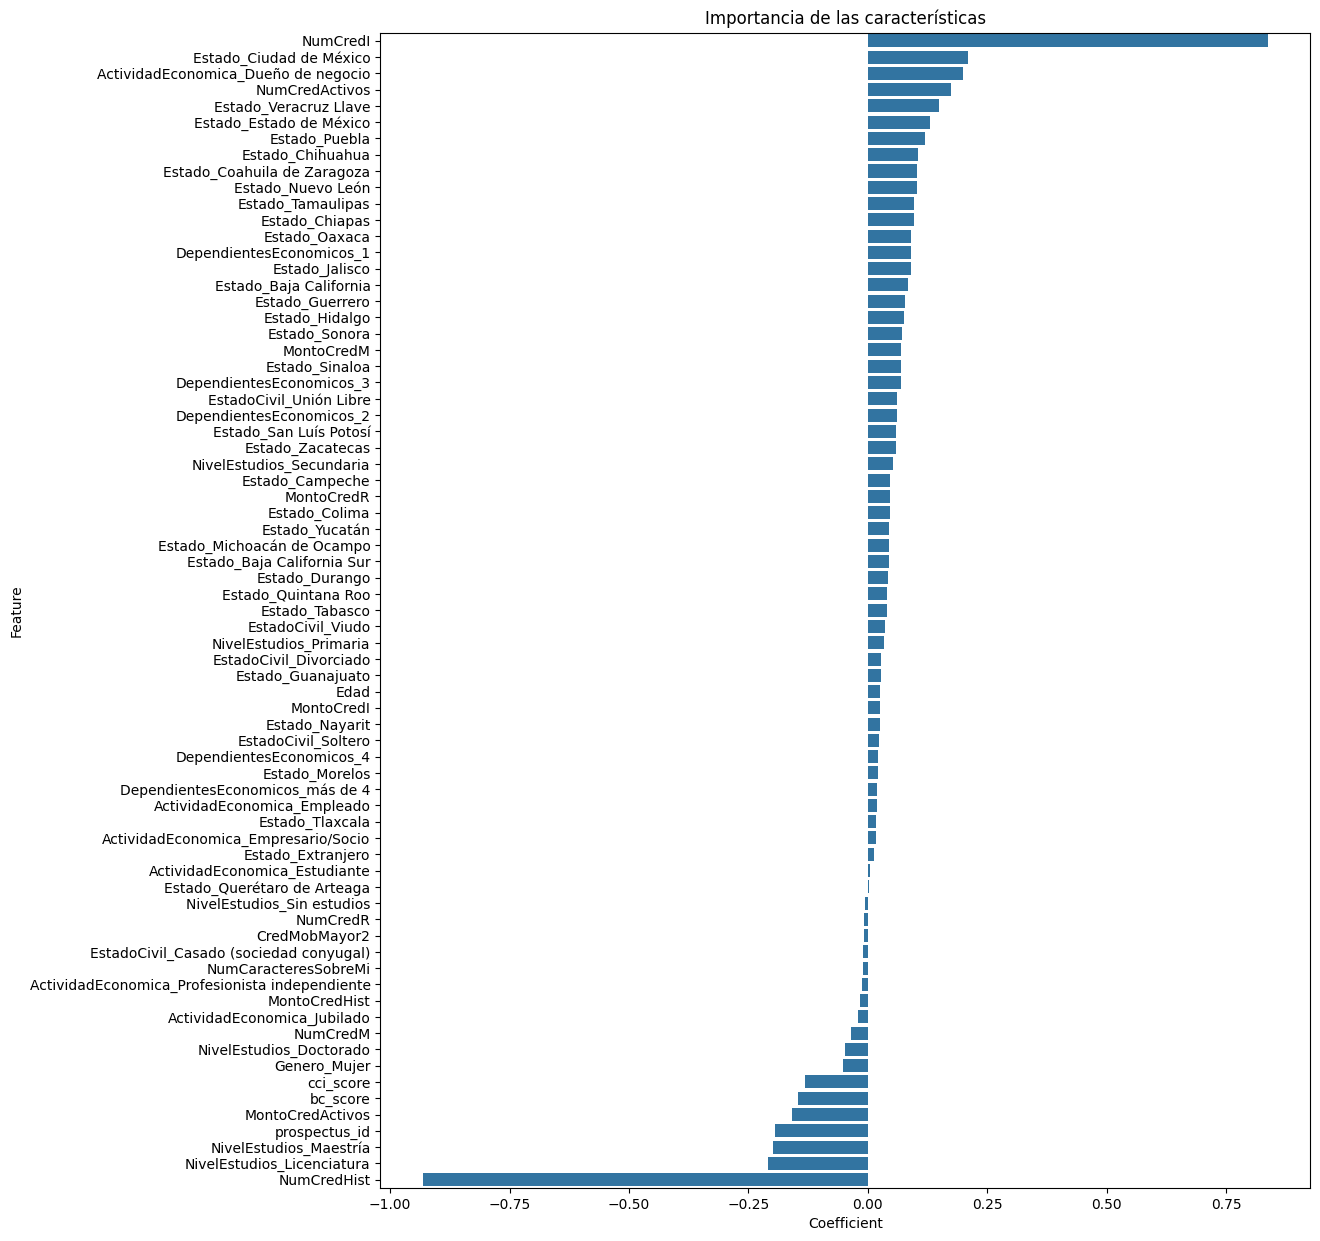

In [21]:
# Grafica de la importancia de las características
plt.figure(figsize=(12, 15))
sns.barplot(x='Coefficient', y='Feature', data=feature_importance.sort_values(by='Coefficient', ascending=False))
plt.title('Importancia de las características')
plt.show()

Notamos que las características más importantes (Feature Importance) son el número de créditos en su historial, y en específico el número de créditos de pagos fijos.

### Evaluar sobreajuste del modelo

In [23]:
y_probs_train = model.predict_proba(X_train)[:, 1]

In [24]:
# Evaluar sobreajuste del modelo
print("Precisión del conjunto de entrenamiento:", roc_auc_score(y_train, y_probs_train))
print("Precisión del conjunto de prueba:", roc_auc_score(y_test, y_probs))

Precisión del conjunto de entrenamiento: 0.6542879524745431
Precisión del conjunto de prueba: 0.649122371888242


Observamos que el modelo no decrece su performance en el set de test, por lo que no existe sobre ajuste

In [25]:
# Evaluar sobreajuste del modelo
train_score = model.score(X_train, y_train)
test_score = model.score(X_test, y_test)
print("Precisión del conjunto de entrenamiento:", train_score)
print("Precisión del conjunto de prueba:", test_score)

Precisión del conjunto de entrenamiento: 0.7984650369528141
Precisión del conjunto de prueba: 0.796048891415577


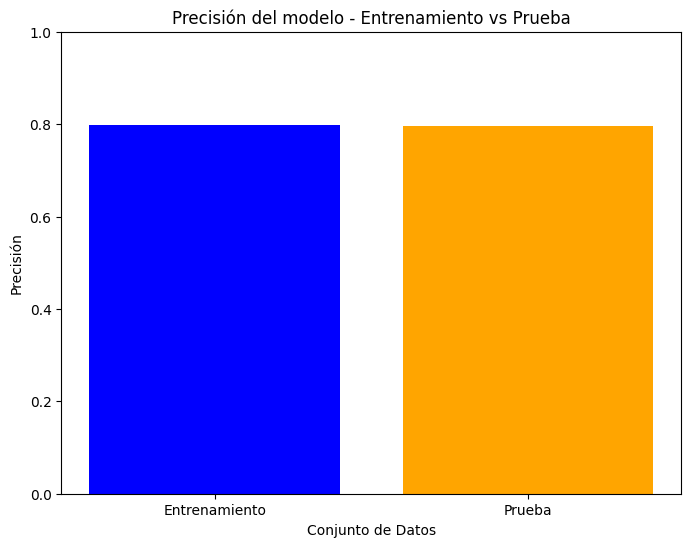

In [26]:
import matplotlib.pyplot as plt

# Definir métricas a graficar
metrics = ['Entrenamiento', 'Prueba']
accuracy_scores = [train_score, test_score]

# Graficar las métricas
plt.figure(figsize=(8, 6))
plt.bar(metrics, accuracy_scores, color=['blue', 'orange'])
plt.title('Precisión del modelo - Entrenamiento vs Prueba')
plt.xlabel('Conjunto de Datos')
plt.ylabel('Precisión')
plt.ylim(0, 1)
plt.show()


## ¿Qué algoritmo se puede utilizar como baseline para predecir las variables objetivo?
### El algoritmo utilizado como baseline para predecir las variables es el de Regresión Logística.
### La regresión logística es una opción apropiada para el Score de Riesgo en Originación de Crédito debido a su capacidad para proporcionar interpretación, manejar problemas binarios, eficiencia computacional y capacidad predictiva adecuada.

## ¿Se puede determinar la importancia de las características para el modelo generado?
### Sí, se puede determinar la importancia de las características utilizando los coeficientes del modelo de regresión logística. En el archivo se muestra cómo se crean las tablas con las características y sus coeficientes, lo que permite identificar cuáles son las más importantes​​.

## ¿El modelo está sub/sobreajustando los datos de entrenamiento?
### El modelo no está ni sobreajustando ni subajustando los datos de entrenamiento. Esto se debe a que las precisiones del conjunto de entrenamiento y del conjunto de prueba son muy similares. Una pequeña diferencia indica que el modelo tiene un buen equilibrio y generaliza bien en los datos de prueba, lo que sugiere un buen desempeño sin problemas significativos de sobreajuste o subajuste.

## ¿Cuál es la métrica adecuada para este problema de negocio?
### La métrica utilizada en el archivo para evaluar el modelo es la ROC (Receiver Operating Curve ). Que es el estándar utilizado en la industria de modelos de riesgo de crédito. Sin embargo, más adelane se explorará la opción de incluir las tablas de Odds para medir la capacidad de discriminación de riesgo en una cartera. Por otro lado,  la métrica adecuada puede depender del contexto específico del negocio y del balance de clases en el conjunto de datos. En muchos problemas de clasificación, además de la precisión, se pueden considerar otras métricas como el F1-score, la precisión, y el recall, especialmente si las clases están desbalanceadas​​.

## ¿Cuál debería ser el desempeño mínimo a obtener?
### Con base a los requisitos de negocio, se proponen el siguiente minimo desempeño:
### AUC-ROC: 0.60 

## El resultado final fue:
### El modelo cumple con el desempeño mínimo requerido.

